In [20]:
import pandas as pd
import re
from textblob import TextBlob

In [21]:
df = pd.read_csv("neet_data.csv")

In [22]:
df.head()

,created_at,retweet_count,source,user_id,user_name,user_description,user_follower_count,user_friends_count,user_location,user_verified,user_url,tweet,length_of_tweet
0,2020-10-31 14:10:28,141,Twitter for Android,1250294694937915394,Rumi,NaN,14,180,NaN,False,NaN,RT @Kwa_Mamkhize: I am giving away R5K to 100 ...,139
1,2020-10-31 14:10:11,1,Twitter for iPhone,57059492,Tom Bewick,"Proud dad of three & cat, @SussexCCC fan. CEO ...",2314,3002,Sussex,False,https://t.co/w6QEi0PBzP,\xf0\x9f\x91\x87This is a really important iss...,140
2,2020-10-31 14:09:48,141,Twitter Web App,1016022678,Lemonade,"Wisdom is knowing the right path to take, Inte...",285,1013,"Bedfordview, South Africa",False,NaN,RT @Kwa_Mamkhize: I am giving away R5K to 100 ...,139
3,2020-10-31 14:09:41,141,Twitter for Android,1085818329816883201,The Rus,NaN,147,467,NaN,False,NaN,RT @Kwa_Mamkhize: I am giving away R5K to 100 ...,139
4,2020-10-31 14:09:22,0,Twitter for Android,1227501071490113537,Sakshi Yadav,it's not my attitude it's my style,2,24,NaN,False,NaN,@RomeshSabharwal @ArvindKejriwal Romesh Sabhar...,140


In [23]:
# Cleaning the tweets

def cleanUpTweet(txt):
    # Remove mentions
    txt = re.sub(r'@[A-Za-z0-9_]+', '', txt)
    # Remove hashtags
    txt = re.sub(r'#', '', txt)
    # Remove retweets:
    txt = re.sub(r'RT : ', '', txt)
    # Remove urls
    txt = re.sub(r'https?:\/\/[A-Za-z0-9\.\/]+', '', txt)
    return txt

In [24]:
df["tweet"] = df["tweet"].apply(cleanUpTweet)

In [25]:
def getTextSubjectivity(txt):
    return TextBlob(txt).sentiment.subjectivity

def getTextPolarity(txt):
    return TextBlob(txt).sentiment.polarity

In [27]:
df['Subjectivity'] = df['tweet'].apply(getTextSubjectivity)
df['Polarity'] = df['tweet'].apply(getTextPolarity)

In [28]:
df.head(50)

,created_at,retweet_count,source,user_id,user_name,user_description,user_follower_count,user_friends_count,user_location,user_verified,user_url,tweet,length_of_tweet,Subjectivity,Polarity
0,2020-10-31 14:10:28,141,Twitter for Android,1250294694937915394,Rumi,NaN,14,180,NaN,False,NaN,I am giving away R5K to 100 lucky winners TODA...,139,0.833333,0.651042
1,2020-10-31 14:10:11,1,Twitter for iPhone,57059492,Tom Bewick,"Proud dad of three & cat, @SussexCCC fan. CEO ...",2314,3002,Sussex,False,https://t.co/w6QEi0PBzP,\xf0\x9f\x91\x87This is a really important iss...,140,1.000000,0.500000
2,2020-10-31 14:09:48,141,Twitter Web App,1016022678,Lemonade,"Wisdom is knowing the right path to take, Inte...",285,1013,"Bedfordview, South Africa",False,NaN,I am giving away R5K to 100 lucky winners TODA...,139,0.833333,0.651042
3,2020-10-31 14:09:41,141,Twitter for Android,1085818329816883201,The Rus,NaN,147,467,NaN,False,NaN,I am giving away R5K to 100 lucky winners TODA...,139,0.833333,0.651042
4,2020-10-31 14:09:22,0,Twitter for Android,1227501071490113537,Sakshi Yadav,it's not my attitude it's my style,2,24,NaN,False,NaN,Romesh Sabharwal ji Ganja fuk lia hai kya? I...,140,0.000000,0.000000
5,2020-10-31 14:07:29,80,Twitter for Android,1160942418,nabat kapoor,Retired. RTs not endorsements.,838,29,kolkatta active 2014,False,NaN,Congratulations Delhi for scoring highest qual...,140,0.000000,0.000000
6,2020-10-31 14:06:34,141,Twitter for Android,1307041172444119056,Stanleyholmes9,I love rapping and I am dam good at it...,14,146,"Durban, South Africa",False,NaN,I am giving away R5K to 100 lucky winners TODA...,139,0.833333,0.651042
7,2020-10-31 14:06:16,0,Twitter for Android,1318205658513158145,Dutch Sissy,I am looking for a mommy or a daddy,11,18,NaN,False,NaN,I neet this outfit \xf0\x9f\x98\x98\xf0\x9f\x9...,46,0.000000,0.000000
8,2020-10-31 14:06:06,141,Twitter for Android,789577875380924416,The Immigrant \xf0\x9f\x87\xbf\xf0\x9f\x87\xbc...,\xc2\xb0 My tweets are my views. \n\xc2\xb0Pat...,1161,1271,Africa,False,NaN,I am giving away R5K to 100 lucky winners TODA...,139,0.833333,0.651042
9,2020-10-31 14:05:59,80,Twitter for Android,1306620999635316736,Shuddhasattwa,Just your regular guy \xf0\x9f\x99\x82,68,682,NaN,False,NaN,Congratulations Delhi for scoring highest qual...,140,0.000000,0.000000


In [29]:
df = df.drop(df[df['tweet'] == ''].index)

In [30]:
df.head(50)

,created_at,retweet_count,source,user_id,user_name,user_description,user_follower_count,user_friends_count,user_location,user_verified,user_url,tweet,length_of_tweet,Subjectivity,Polarity
0,2020-10-31 14:10:28,141,Twitter for Android,1250294694937915394,Rumi,NaN,14,180,NaN,False,NaN,I am giving away R5K to 100 lucky winners TODA...,139,0.833333,0.651042
1,2020-10-31 14:10:11,1,Twitter for iPhone,57059492,Tom Bewick,"Proud dad of three & cat, @SussexCCC fan. CEO ...",2314,3002,Sussex,False,https://t.co/w6QEi0PBzP,\xf0\x9f\x91\x87This is a really important iss...,140,1.000000,0.500000
2,2020-10-31 14:09:48,141,Twitter Web App,1016022678,Lemonade,"Wisdom is knowing the right path to take, Inte...",285,1013,"Bedfordview, South Africa",False,NaN,I am giving away R5K to 100 lucky winners TODA...,139,0.833333,0.651042
3,2020-10-31 14:09:41,141,Twitter for Android,1085818329816883201,The Rus,NaN,147,467,NaN,False,NaN,I am giving away R5K to 100 lucky winners TODA...,139,0.833333,0.651042
4,2020-10-31 14:09:22,0,Twitter for Android,1227501071490113537,Sakshi Yadav,it's not my attitude it's my style,2,24,NaN,False,NaN,Romesh Sabharwal ji Ganja fuk lia hai kya? I...,140,0.000000,0.000000
5,2020-10-31 14:07:29,80,Twitter for Android,1160942418,nabat kapoor,Retired. RTs not endorsements.,838,29,kolkatta active 2014,False,NaN,Congratulations Delhi for scoring highest qual...,140,0.000000,0.000000
6,2020-10-31 14:06:34,141,Twitter for Android,1307041172444119056,Stanleyholmes9,I love rapping and I am dam good at it...,14,146,"Durban, South Africa",False,NaN,I am giving away R5K to 100 lucky winners TODA...,139,0.833333,0.651042
7,2020-10-31 14:06:16,0,Twitter for Android,1318205658513158145,Dutch Sissy,I am looking for a mommy or a daddy,11,18,NaN,False,NaN,I neet this outfit \xf0\x9f\x98\x98\xf0\x9f\x9...,46,0.000000,0.000000
8,2020-10-31 14:06:06,141,Twitter for Android,789577875380924416,The Immigrant \xf0\x9f\x87\xbf\xf0\x9f\x87\xbc...,\xc2\xb0 My tweets are my views. \n\xc2\xb0Pat...,1161,1271,Africa,False,NaN,I am giving away R5K to 100 lucky winners TODA...,139,0.833333,0.651042
9,2020-10-31 14:05:59,80,Twitter for Android,1306620999635316736,Shuddhasattwa,Just your regular guy \xf0\x9f\x99\x82,68,682,NaN,False,NaN,Congratulations Delhi for scoring highest qual...,140,0.000000,0.000000


In [31]:
# negative, nautral, positive analysis
def getTextAnalysis(a):
    if a < 0:
        return "Negative"
    elif a == 0:
        return "Neutral"
    else:
        return "Positive"

In [32]:
df['Score'] = df['Polarity'].apply(getTextAnalysis)

In [33]:
df.head(50)

,created_at,retweet_count,source,user_id,user_name,user_description,user_follower_count,user_friends_count,user_location,user_verified,user_url,tweet,length_of_tweet,Subjectivity,Polarity,Score
0,2020-10-31 14:10:28,141,Twitter for Android,1250294694937915394,Rumi,NaN,14,180,NaN,False,NaN,I am giving away R5K to 100 lucky winners TODA...,139,0.833333,0.651042,Positive
1,2020-10-31 14:10:11,1,Twitter for iPhone,57059492,Tom Bewick,"Proud dad of three & cat, @SussexCCC fan. CEO ...",2314,3002,Sussex,False,https://t.co/w6QEi0PBzP,\xf0\x9f\x91\x87This is a really important iss...,140,1.000000,0.500000,Positive
2,2020-10-31 14:09:48,141,Twitter Web App,1016022678,Lemonade,"Wisdom is knowing the right path to take, Inte...",285,1013,"Bedfordview, South Africa",False,NaN,I am giving away R5K to 100 lucky winners TODA...,139,0.833333,0.651042,Positive
3,2020-10-31 14:09:41,141,Twitter for Android,1085818329816883201,The Rus,NaN,147,467,NaN,False,NaN,I am giving away R5K to 100 lucky winners TODA...,139,0.833333,0.651042,Positive
4,2020-10-31 14:09:22,0,Twitter for Android,1227501071490113537,Sakshi Yadav,it's not my attitude it's my style,2,24,NaN,False,NaN,Romesh Sabharwal ji Ganja fuk lia hai kya? I...,140,0.000000,0.000000,Neutral
5,2020-10-31 14:07:29,80,Twitter for Android,1160942418,nabat kapoor,Retired. RTs not endorsements.,838,29,kolkatta active 2014,False,NaN,Congratulations Delhi for scoring highest qual...,140,0.000000,0.000000,Neutral
6,2020-10-31 14:06:34,141,Twitter for Android,1307041172444119056,Stanleyholmes9,I love rapping and I am dam good at it...,14,146,"Durban, South Africa",False,NaN,I am giving away R5K to 100 lucky winners TODA...,139,0.833333,0.651042,Positive
7,2020-10-31 14:06:16,0,Twitter for Android,1318205658513158145,Dutch Sissy,I am looking for a mommy or a daddy,11,18,NaN,False,NaN,I neet this outfit \xf0\x9f\x98\x98\xf0\x9f\x9...,46,0.000000,0.000000,Neutral
8,2020-10-31 14:06:06,141,Twitter for Android,789577875380924416,The Immigrant \xf0\x9f\x87\xbf\xf0\x9f\x87\xbc...,\xc2\xb0 My tweets are my views. \n\xc2\xb0Pat...,1161,1271,Africa,False,NaN,I am giving away R5K to 100 lucky winners TODA...,139,0.833333,0.651042,Positive
9,2020-10-31 14:05:59,80,Twitter for Android,1306620999635316736,Shuddhasattwa,Just your regular guy \xf0\x9f\x99\x82,68,682,NaN,False,NaN,Congratulations Delhi for scoring highest qual...,140,0.000000,0.000000,Neutral


In [34]:
positive = df[df['Score'] == 'Positive']

print(str(positive.shape[0]/(df.shape[0])*100) + " % of positive tweets")

34.579261729385195 % of positive tweets


In [36]:
import matplotlib.pyplot as plt

<BarContainer object of 3 artists>

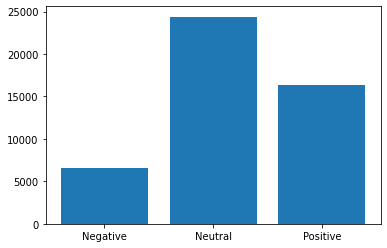

In [37]:
labels = df.groupby('Score').count().index.values

values = df.groupby('Score').size().values

plt.bar(labels, values)

In [39]:
for index, row in df.iterrows():
    if row['Score'] == 'Positive':
        plt.scatter(row['Polarity'], row['Subjectivity'], color="green")
    elif row['Score'] == 'Negative':
        plt.scatter(row['Polarity'], row['Subjectivity'], color="red")
    elif row['Score'] == 'Neutral':
        plt.scatter(row['Polarity'], row['Subjectivity'], color="blue")

plt.title('Twitter Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
# add legend
plt.show()

KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7f95fdd72f28> (for post_execute):


KeyboardInterrupt: ignored

In [40]:
objective = df[df['Subjectivity'] == 0]

print(str(objective.shape[0]/(df.shape[0])*100) + " % of objective tweets")

44.00920200080201 % of objective tweets
